In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
filterwarnings('ignore')

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [2]:
WQ = pd.read_csv("water_potability.csv")
WQ

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
WQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Identification and Counting of the Missing Values

In [4]:
WQ.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Visualisation of data

In [5]:
# Count the potablity classification and disply in pie chart
WQ["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

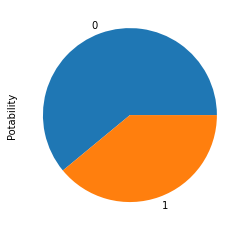

In [6]:
WQ.Potability.value_counts().plot(kind='pie')

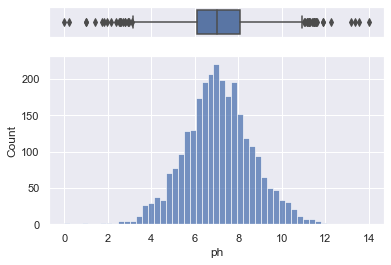

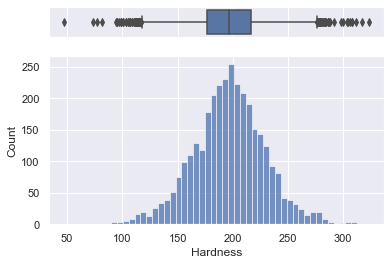

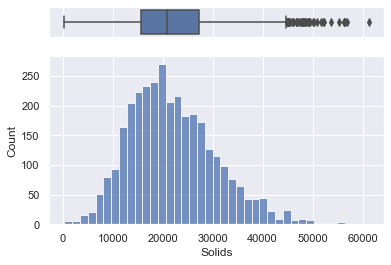

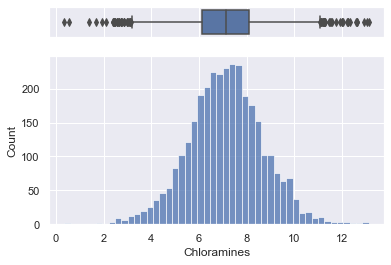

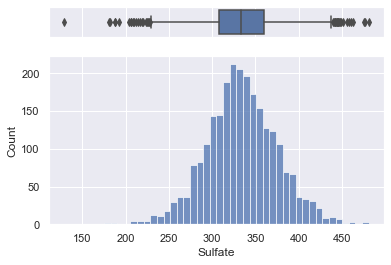

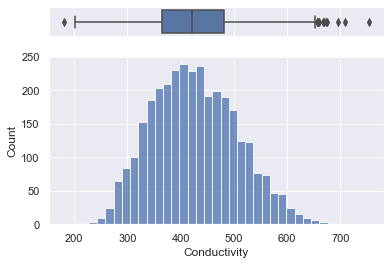

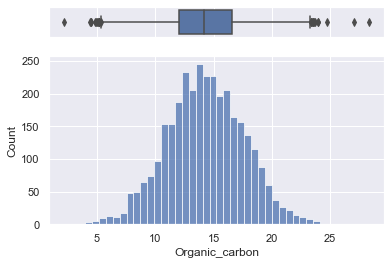

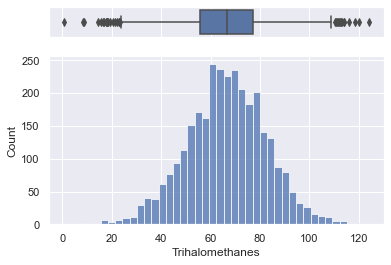

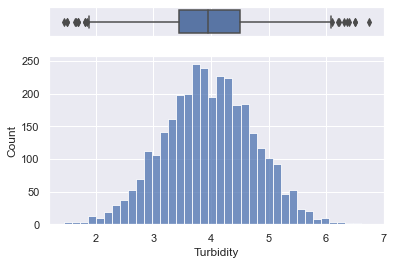

In [7]:
for m in range(0, len((WQ.columns))-1):
    sns.set(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    x = WQ.columns[m]
    sns.boxplot(WQ[x] , ax=ax_box)
    sns.histplot(data=WQ, x = x, ax=ax_hist)
    ax_box.set(xlabel='')
    plt.show()

 # Treating Missing Values

In [8]:
WQ.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
# Describe the statistical parameters where potability == 0
WQ[WQ['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [10]:
WQ.loc[(WQ['ph'] <= 3) & (WQ['Potability']==1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
354,2.798549,311.383956,26931.243483,7.116897,NaN,521.140524,14.235154,42.080353,3.663252,1
692,1.757037,147.581831,41538.242730,7.728177,376.012933,428.444823,10.828696,65.005840,2.967554,1
726,0.227499,152.530111,39028.599340,3.462492,283.693782,443.029232,13.201943,62.322711,3.545741,1
810,0.989912,133.216942,16922.853899,9.293289,444.375731,322.291191,10.430076,43.578466,5.160604,1
2300,2.974429,147.148675,17326.202253,2.498597,393.168745,375.411470,12.798187,76.413069,2.779902,1
2343,2.538116,100.806520,19872.854854,5.014023,418.000000,420.830866,13.980891,85.943192,2.840097,1


# Impute the missing values using knn imputer

In [11]:
Before_imputation = WQ
#print dataset before imputaion
print("Data Before performing imputation\n",WQ)
  
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=4)
After_Imputation = imputer.fit_transform(Before_imputation)
WQI = pd.DataFrame(After_Imputation)
WQI.rename(columns = {0:'ph', 1:'Hardness', 2:'Solids', 3:'Chloramines', 4:'Sulfate', 5:'Coductivity', 6:'Organic_carbon', 7:'Trihalomethanes', 8:'Turbidity', 9:'Potability'}, inplace = True)
print("\n\nAfter performing imputation\n",WQI)

Data Before performing imputation
             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963

In [12]:
WQI.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Coductivity        0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
# Correlation between various column parameters
WQ.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# Data Standardisation and Train, Test split using sklearn

In [14]:
# Import Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
# RSeparate the data set columns in to dependant and independant variables
X = WQI.drop('Potability',axis=1).values
y = WQI['Potability'].values

# Split the dataset into train test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [16]:
# Standardisation of data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
!pip install imblearn

# Balancing the dataset with oversampling

In [18]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2790, 9)
After OverSampling, the shape of train_y: (2790,) 

After OverSampling, counts of label '1': 1395
After OverSampling, counts of label '0': 1395


# Modeling and Classification Accuracy

In [19]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]


In [20]:
results_test = []
names_test = []
finalResults_test = []

results_train = []
names_train = []
finalResults_train = []
print("Model", "      Score_train_data", "     score_test_data")
print("______", "     ________________", "     ________________")
for name,model in models:
    model.fit(X_train_res, y_train_res)
    
    # Predictions on test data
    model_results_test = model.predict(X_test)
    score_test = precision_score(y_test, model_results_test,average='macro')
    results_test.append(score_test)
    names_test.append(name)
    finalResults_test.append((name,score_test))
    
    # Predictions on training data
    model_results_train = model.predict(X_train_res)
    score_train = precision_score(y_train_res, model_results_train,average='macro')
    results_train.append(score_train)
    names_train.append(name)
    finalResults_train.append((name,score_train))
    
    # Print Accuracy Scores for each model
    print(name, "        ",round(score_train, 3), "               ",round(score_test,3), "\n")
    
    
#finalResults_test.sort(key=lambda k:k[1],reverse=True)


Model       Score_train_data      score_test_data
______      ________________      ________________
LR          0.522                 0.488 

SVC          0.75                 0.64 

KNN          0.746                 0.608 

DTC          1.0                 0.543 

GNB          0.576                 0.565 

SGDC          0.526                 0.494 

Perc          0.494                 0.481 

NC          0.527                 0.493 

Ridge          0.522                 0.488 

NuSVC          0.88                 0.619 

BNB          0.511                 0.5 

RF          1.0                 0.635 

ADA          0.63                 0.556 

XGB          0.763                 0.606 

PAC          0.497                 0.492 



# Treating the Outliers

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
random_state = np.random.RandomState(42)

In [23]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(WQI[["ph",'Hardness','Solids','Chloramines','Sulfate', 'Coductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity','Potability']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x2A260606940, 'verbose': 0, 'warm_start': False}


In [24]:
WQI['scores'] = model.decision_function(WQI[["ph",'Hardness','Solids','Chloramines','Sulfate', 'Coductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity','Potability']])

WQI['anomaly_score'] = model.predict(WQI[["ph",'Hardness','Solids','Chloramines','Sulfate', 'Coductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity','Potability']])

WQI[WQI['anomaly_score']==-1]

,ph,Hardness,Solids,Chloramines,Sulfate,Coductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,scores,anomaly_score
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0.0,-0.018801,-1
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0.0,-0.032541,-1
26,3.445062,207.926260,33424.768678,8.782147,384.007006,441.785876,13.805902,30.284597,4.184397,0.0,-0.015389,-1
29,7.595638,148.153061,15193.413474,9.046833,307.011793,563.804743,16.568656,52.676185,6.038185,0.0,-0.024242,-1
43,9.920691,202.817483,9973.934059,6.882248,337.350529,333.192470,23.917601,71.833624,4.690707,0.0,-0.013959,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3257,6.683368,272.111698,18989.316768,5.336202,336.555100,307.725009,20.178716,75.402260,5.208061,1.0,-0.029530,-1
3260,8.955650,134.736856,9000.025591,9.026293,351.970735,428.213987,8.668672,74.773392,3.699558,1.0,-0.017165,-1
3261,3.629922,244.187392,24856.633209,6.618071,366.967873,442.076337,13.302880,59.489294,4.754826,1.0,-0.008236,-1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1.0,-0.057776,-1


In [25]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(WQI[["Organic_carbon"]])

print(model.get_params())

WQI['scores'] = model.decision_function(WQI[['Organic_carbon']])

WQI['anomaly_score'] = model.predict(WQI[['Organic_carbon']])

WQI[WQI['anomaly_score']==-1]

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x2A260606940, 'verbose': 0, 'warm_start': False}


,ph,Hardness,Solids,Chloramines,Sulfate,Coductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,scores,anomaly_score
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0.0,-0.065179,-1
13,6.351419,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0.0,-0.019425,-1
16,7.051786,211.049406,30980.600787,10.094796,346.007262,315.141267,20.397022,56.651604,4.268429,0.0,-0.093619,-1
30,7.181449,209.625601,15196.229987,5.994679,338.336431,342.111286,7.922598,71.537953,5.088860,0.0,-0.078928,-1
36,3.641630,183.908722,24752.072460,5.538314,286.059556,456.860096,9.034067,73.594657,3.464353,0.0,-0.039989,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3257,6.683368,272.111698,18989.316768,5.336202,336.555100,307.725009,20.178716,75.402260,5.208061,1.0,-0.072651,-1
3260,8.955650,134.736856,9000.025591,9.026293,351.970735,428.213987,8.668672,74.773392,3.699558,1.0,-0.055103,-1
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1.0,-0.017530,-1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1.0,-0.014045,-1


# Final Model with Hyperparameter Tuning

In [26]:
model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    },
    'SVC':
    {
        'model':SVC(),
        'params':
        {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']
        }
    },
    
    'KNN':
    {
        'model':KNeighborsClassifier(),
        'params':
        {
            'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }
    }
}

In [27]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
scores_test=[]

for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20)
    rs.fit(X_train_res,y_train_res)
    rs_prediction = rs.predict(X_test)
    scores_test = precision_score(y_test, rs_prediction,average='macro')
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
    scores_test
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

,Model,Parameters,Score
0,XGB,"{'n_estimators': 500, 'max_features': 'log2', ...",0.728853
1,Random Forest,"{'n_estimators': 200, 'max_features': 'log2', ...",0.681900
2,SVC,"{'kernel': 'rbf', 'gamma': 1, 'C': 100}",0.751792
3,KNN,"{'weights': 'distance', 'n_neighbors': 5, 'met...",0.706631


In [28]:
scores

[['XGB',
  {'n_estimators': 500,
   'max_features': 'log2',
   'max_depth': 10,
   'learning_rate': 0.1},
  0.7288530465949821],
 ['Random Forest',
  {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 10},
  0.681899641577061],
 ['SVC', {'kernel': 'rbf', 'gamma': 1, 'C': 100}, 0.7517921146953405],
 ['KNN',
  {'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean'},
  0.7066308243727597]]

# Saving the file as classifier.pkl for deployment

In [ ]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(rs, pickle_out) 
pickle_out.close()